In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

import os



from pandas_profiling import ProfileReport

import numpy as np
from itertools import chain

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pi


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from IPython.display import display, HTML

<img src ="Workflow.png">

In [2]:
df = pd.read_excel("Email Performance Analytics _Data.xlsx")

In [3]:
df.head()

Midascontactid  Createdat Emailpermissionstatus Cont.Acq.Src Email.Src.First Segment Segmentsecondary Email.Acq.Dt Email.Pref.Ch.Dt                                   Entry.Point.List Cont.Acq.Src2 Cont.Acq.Dte Prod.Buy.Last Prod.Buy.First Prod.Buy.Accessories Prod.Buy.All.In.One.Desktop Prod.Buy.Desktop Prod.Buy.Idc Prod.Buy.Idpd Prod.Buy.Laptop Prod.Buy.Servers  Prod.Buy.Software Prod.Buy.Thnkc Prod.Buy.Thnkp Prod.Buy.Warranties Prod.Buy.Workstation Prod.Buy.Android.Tablet Prod.Buy.Windows.Tablet Prod.Buy.Convertible Prod.Buy.Android.Os Prod.Buy.Gaming Prod.Buy.Windows.Os Prod.Buy.Gaming.Related Country  Eml.Sent.Num Eml.Sent.First.Ts Eml.Sent.Last.Ts  Eml.Open.Num Eml.Open.First.Ts Eml.Open.Last.Ts  Eml.Click.Num Eml.Click.First.Ts Eml.Click.Last.Ts Eml.Bounce.Last.Ts Eml.Unsub.Last.Ts Eml.Spam.Last.Ts Email.Domain Em.Pref.Status Em.Pref.Dte Invalid.Email.Dte  Em.Spamclplt.Dte
0      1020375449 2019-04-23                     I     LIDUAS16        OOBWIN15     CON              NaN   2019-04-22       2019-08-24                 |LIDUAS1608|OOBAND1407|OOBWIN1506|      LIDUAS16   2017-03-03    2019-08-24     2019-04-22                  NaT                  2019-04-22              NaT   2019-04-22           NaT             NaT              NaT                NaN            NaT            NaT                 NaT                  NaT                     NaT                     NaT                  NaT                 NaT             NaT                 NaT                     NaT      US         228.0        2017-03-03       2020-02-20          41.0        2017-03-11       2020-02-17            1.0         2019-08-21        2019-08-21                NaT               NaT              NaT    gmail.com              I  2019-08-24               NaT               NaN
1      1042778096 2019-10-16                     U     OOBWIN15             NaN     CON              NaN          NaT       2019-10-15                                       |OOBWIN1506|      OOBWIN15   2019-10-15    2019-10-15     2019-10-15                  NaT                         NaT              NaT          NaT           NaT             NaT              NaT                NaN            NaT     2019-10-15                 NaT                  NaT                     NaT                     NaT                  NaT                 NaT             NaT                 NaT                     NaT      US           2.0        2019-11-25       2019-12-24           0.0               NaT              NaT            0.0                NaT               NaT                NaT               NaT              NaT  hotmail.com              U  2019-10-15               NaT               NaN
2      1039527195 2019-07-29                     I     NETMINNG        NETMINNG     CON              NaN   2019-07-29       2019-07-30       |HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|      NETMINNG   2019-07-29    2019-07-30     2019-07-30                  NaT                         NaT              NaT          NaT    2019-07-30             NaT              NaT                NaN            NaT            NaT                 NaT                  NaT                     NaT                     NaT                  NaT                 NaT             NaT                 NaT                     NaT      US         121.0        2019-07-29       2020-02-20           4.0        2019-07-29       2020-02-17            0.0                NaT               NaT                NaT               NaT              NaT  hotmail.com              I  2019-07-30               NaT               NaN
3      1008356168 2019-11-29                     I         EPI2            EPI2     CON              NaN   2015-11-04       2019-11-29  |HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...          EPI2   2015-11-04    2019-11-29     2016-07-26                  NaT                         NaT       2016-07-26          NaT    2019-11-29             NaT              NaT                NaN            NaT            NaT       

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head(5)

Midascontactid  Createdat Emailpermissionstatus Cont.Acq.Src Email.Src.First Segment Segmentsecondary Email.Acq.Dt Email.Pref.Ch.Dt                                   Entry.Point.List Cont.Acq.Src2 Cont.Acq.Dte Prod.Buy.Last Prod.Buy.First Prod.Buy.Accessories Prod.Buy.All.In.One.Desktop Prod.Buy.Desktop Prod.Buy.Idc Prod.Buy.Idpd Prod.Buy.Laptop Prod.Buy.Servers  Prod.Buy.Software Prod.Buy.Thnkc Prod.Buy.Thnkp Prod.Buy.Warranties Prod.Buy.Workstation Prod.Buy.Android.Tablet Prod.Buy.Windows.Tablet Prod.Buy.Convertible Prod.Buy.Android.Os Prod.Buy.Gaming Prod.Buy.Windows.Os Prod.Buy.Gaming.Related Country  Eml.Sent.Num Eml.Sent.First.Ts Eml.Sent.Last.Ts  Eml.Open.Num Eml.Open.First.Ts Eml.Open.Last.Ts  Eml.Click.Num Eml.Click.First.Ts Eml.Click.Last.Ts Eml.Bounce.Last.Ts Eml.Unsub.Last.Ts Eml.Spam.Last.Ts Email.Domain Em.Pref.Status Em.Pref.Dte Invalid.Email.Dte  Em.Spamclplt.Dte
0      1020375449 2019-04-23                     I     LIDUAS16        OOBWIN15     CON              NaN   2019-04-22       2019-08-24                 |LIDUAS1608|OOBAND1407|OOBWIN1506|      LIDUAS16   2017-03-03    2019-08-24     2019-04-22                  NaT                  2019-04-22              NaT   2019-04-22           NaT             NaT              NaT                NaN            NaT            NaT                 NaT                  NaT                     NaT                     NaT                  NaT                 NaT             NaT                 NaT                     NaT      US         228.0        2017-03-03       2020-02-20          41.0        2017-03-11       2020-02-17            1.0         2019-08-21        2019-08-21                NaT               NaT              NaT    gmail.com              I  2019-08-24               NaT               NaN
1      1042778096 2019-10-16                     U     OOBWIN15             NaN     CON              NaN          NaT       2019-10-15                                       |OOBWIN1506|      OOBWIN15   2019-10-15    2019-10-15     2019-10-15                  NaT                         NaT              NaT          NaT           NaT             NaT              NaT                NaN            NaT     2019-10-15                 NaT                  NaT                     NaT                     NaT                  NaT                 NaT             NaT                 NaT                     NaT      US           2.0        2019-11-25       2019-12-24           0.0               NaT              NaT            0.0                NaT               NaT                NaT               NaT              NaT  hotmail.com              U  2019-10-15               NaT               NaN
2      1039527195 2019-07-29                     I     NETMINNG        NETMINNG     CON              NaN   2019-07-29       2019-07-30       |HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|      NETMINNG   2019-07-29    2019-07-30     2019-07-30                  NaT                         NaT              NaT          NaT    2019-07-30             NaT              NaT                NaN            NaT            NaT                 NaT                  NaT                     NaT                     NaT                  NaT                 NaT             NaT                 NaT                     NaT      US         121.0        2019-07-29       2020-02-20           4.0        2019-07-29       2020-02-17            0.0                NaT               NaT                NaT               NaT              NaT  hotmail.com              I  2019-07-30               NaT               NaN
3      1008356168 2019-11-29                     I         EPI2            EPI2     CON              NaN   2015-11-04       2019-11-29  |HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...          EPI2   2015-11-04    2019-11-29     2016-07-26                  NaT                         NaT       2016-07-26          NaT    2019-11-29             NaT              NaT                NaN            NaT            NaT       

In [6]:

# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
missing_values_table(df)


Your selected dataframe has 51 columns.
There are 43 columns that have missing values.


Values  % of Total Values            type
Em.Spamclplt.Dte              10000              100.0         float64
Prod.Buy.Software             10000              100.0         float64
Prod.Buy.Servers               9999              100.0  datetime64[ns]
Prod.Buy.Workstation           9999              100.0  datetime64[ns]
Prod.Buy.Windows.Tablet        9998              100.0  datetime64[ns]
Prod.Buy.Android.Os            9998              100.0  datetime64[ns]
Prod.Buy.Android.Tablet        9998              100.0  datetime64[ns]
Prod.Buy.Convertible           9994               99.9  datetime64[ns]
Eml.Bounce.Last.Ts             9988               99.9  datetime64[ns]
Eml.Spam.Last.Ts               9976               99.8  datetime64[ns]
Prod.Buy.Windows.Os            9973               99.7  datetime64[ns]
Prod.Buy.Accessories           9962               99.6  datetime64[ns]
Invalid.Email.Dte              9947               99.5  datetime64[ns]
Prod.Buy.Laptop                9914               99.1  datetime64[ns]
Prod.Buy.Thnkc                 9914               99.1  datetime64[ns]
Segmentsecondary               9913               99.1          object
Eml.Unsub.Last.Ts              9899               99.0  datetime64[ns]
Prod.Buy.Gaming.Related        9797               98.0  datetime64[ns]
Prod.Buy.Warranties            9749               97.5  datetime64[ns]
Prod.Buy.All.In.One.Desktop    9740               97.4  datetime64[ns]
Prod.Buy.Gaming                9630               96.3  datetime64[ns]
Prod.Buy.Desktop               9590               95.9  datetime64[ns]
Prod.Buy.Idc                   9477               94.8  datetime64[ns]
Prod.Buy.Thnkp                 9136               91.4  datetime64[ns]
Eml.Click.First.Ts             8545               85.4  datetime64[ns]
Eml.Click.Last.Ts              8545               85.4  datetime64[ns]
Eml.Open.First.Ts              6217               62.2  datetime64[ns]
Eml.Open.Last.Ts               6217               62.2  datetime64[ns]
Prod.Buy.Idpd                  5401               54.0  datetime64[ns]
Email.Acq.Dt                   3726               37.3  datetime64[ns]
Email.Src.First                3726               37.3          object
Eml.Sent.First.Ts              2121               21.2  datetime64[ns]
Eml.Sent.Last.Ts               2121               21.2  datetime64[ns]
Prod.Buy.First                 1520               15.2  datetime64[ns]
Prod.Buy.Last                  1520               15.2  datetime64[ns]
Eml.Sent.Num                    141                1.4         float64
Eml.Open.Num                    141                1.4         float64
Eml.Click.Num                   141                1.4         float64
Email.Pref.Ch.Dt                 57                0.6  datetime64[ns]
Entry.Point.List                 57                0.6          object
Cont.Acq.Dte                     57                0.6  datetime64[ns]
Cont.Acq.Src2                    57                0.6          object
Cont.Acq.Src                     57                0.6          object

In [8]:
df.shape

(10000, 51)

In [9]:
df.columns

Index(['Midascontactid', 'Createdat', 'Emailpermissionstatus', 'Cont.Acq.Src', 'Email.Src.First', 'Segment', 'Segmentsecondary', 'Email.Acq.Dt', 'Email.Pref.Ch.Dt', 'Entry.Point.List', 'Cont.Acq.Src2', 'Cont.Acq.Dte', 'Prod.Buy.Last', 'Prod.Buy.First', 'Prod.Buy.Accessories', 'Prod.Buy.All.In.One.Desktop', 'Prod.Buy.Desktop', 'Prod.Buy.Idc', 'Prod.Buy.Idpd', 'Prod.Buy.Laptop', 'Prod.Buy.Servers', 'Prod.Buy.Software', 'Prod.Buy.Thnkc', 'Prod.Buy.Thnkp', 'Prod.Buy.Warranties', 'Prod.Buy.Workstation', 'Prod.Buy.Android.Tablet', 'Prod.Buy.Windows.Tablet', 'Prod.Buy.Convertible', 'Prod.Buy.Android.Os', 'Prod.Buy.Gaming', 'Prod.Buy.Windows.Os', 'Prod.Buy.Gaming.Related', 'Country', 'Eml.Sent.Num', 'Eml.Sent.First.Ts', 'Eml.Sent.Last.Ts', 'Eml.Open.Num', 'Eml.Open.First.Ts', 'Eml.Open.Last.Ts', 'Eml.Click.Num', 'Eml.Click.First.Ts', 'Eml.Click.Last.Ts', 'Eml.Bounce.Last.Ts', 'Eml.Unsub.Last.Ts', 'Eml.Spam.Last.Ts', 'Email.Domain', 'Em.Pref.Status', 'Em.Pref.Dte', 'Invalid.Email.Dte',
       '

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
Midascontactid                 10000 non-null int64
Createdat                      10000 non-null datetime64[ns]
Emailpermissionstatus          10000 non-null object
Cont.Acq.Src                   9943 non-null object
Email.Src.First                6274 non-null object
Segment                        10000 non-null object
Segmentsecondary               87 non-null object
Email.Acq.Dt                   6274 non-null datetime64[ns]
Email.Pref.Ch.Dt               9943 non-null datetime64[ns]
Entry.Point.List               9943 non-null object
Cont.Acq.Src2                  9943 non-null object
Cont.Acq.Dte                   9943 non-null datetime64[ns]
Prod.Buy.Last                  8480 non-null datetime64[ns]
Prod.Buy.First                 8480 non-null datetime64[ns]
Prod.Buy.Accessories           38 non-null datetime64[ns]
Prod.Buy.All.In.One.Desktop    260 non-null datetime64[ns

In [11]:
df.describe()

Midascontactid  Prod.Buy.Software  Eml.Sent.Num  Eml.Open.Num  Eml.Click.Num  Em.Spamclplt.Dte
count    1.000000e+04                0.0   9859.000000   9859.000000    9859.000000               0.0
mean     1.025421e+09                NaN     18.090881      3.526423       0.421645               NaN
std      1.143535e+08                NaN     35.222399     14.974394       2.166769               NaN
min      2.000102e+08                NaN      0.000000      0.000000       0.000000               NaN
25%      1.039377e+09                NaN      1.000000      0.000000       0.000000               NaN
50%      1.042088e+09                NaN      3.000000      0.000000       0.000000               NaN
75%      1.044632e+09                NaN     17.000000      2.000000       0.000000               NaN
max      1.047128e+09                NaN    267.000000    572.000000      81.000000               NaN

In [12]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

Email permission when the data was pulled

I-Opted in


O-Opted out


U-Did not opt in or out


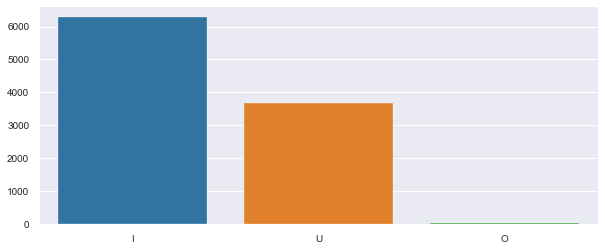

In [13]:
Emailpermissionstatus  = df.Emailpermissionstatus .value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Emailpermissionstatus .index, y=Emailpermissionstatus .values)
plt.show()

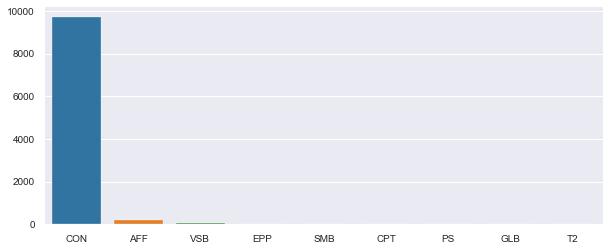

In [14]:
Segment = df.Segment.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Segment.index, y=Segment.values)
plt.show()

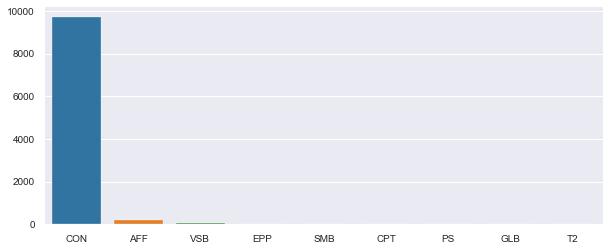

In [15]:
Segmentsecondary = df.Segmentsecondary.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Segment.index, y=Segment.values)
plt.show()

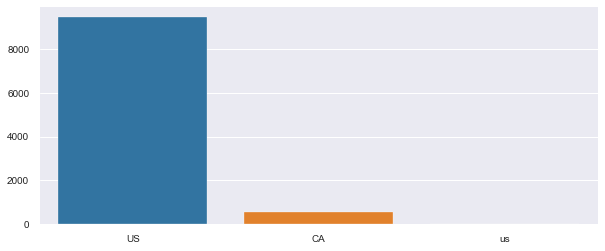

In [16]:
Country = df.Country.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Country.index, y=Country.values)
plt.show()

In [17]:
#df = df.dropna(axis=1)
#df

In [18]:
df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [19]:
df  = df[["Midascontactid","Country","Createdat","Emailpermissionstatus","Segment","Eml.Sent.Num","Eml.Open.Num","Eml.Click.Num"]]

In [20]:
profile = ProfileReport(df)

In [21]:
profile

In [22]:
df.shape

(10000, 8)

In [23]:
df = df.rename(columns={"Email.Domain": "Email_Domain", "Eml.Sent.Num": "Em_Sent_Num", "Eml.Open.Num": "Eml_open_Num","Eml.Click.Num":"Eml_Click_Num"})

In [24]:
#df = df[["Country","Midascontactid","Createdat","Emailpermissionstatus","Segment","Email_Domain"]]

In [25]:
#df["Email_Domain"].nunique()

In [26]:
df.head()

Midascontactid Country  Createdat Emailpermissionstatus Segment  Em_Sent_Num  Eml_open_Num  Eml_Click_Num
0      1020375449      US 2019-04-23                     I     CON        228.0          41.0            1.0
1      1042778096      US 2019-10-16                     U     CON          2.0           0.0            0.0
2      1039527195      US 2019-07-29                     I     CON        121.0           4.0            0.0
3      1008356168      US 2019-11-29                     I     CON         15.0           2.0            2.0
4      1038164470      US 2019-04-30                     U     CON         20.0           1.0            1.0

In [27]:
df['Em_Sent_Num'] = df['Eml_open_Num']*df['Eml_Click_Num']

tst = df.groupby(['Createdat','Midascontactid'])
        
tst.size()

# converting 
df['date'] = df['Createdat'].map(lambda x: 100*x.year + x.month)

tst = df.groupby(['date'])
tst.size()

date
201904     510
201905     543
201906     609
201907     714
201908    1167
201909    1358
201910     767
201911     866
201912    1565
202001     876
202002     806
202003     219
dtype: int64

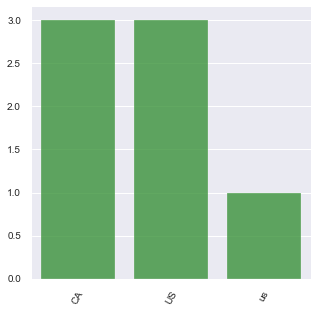

In [28]:
# checking country-wise sales 
Cust_country=df[['Country','Emailpermissionstatus']].drop_duplicates()

#Calculating the distinct count of customer for each country
Cust_country_count=Cust_country.groupby(['Country'])['Emailpermissionstatus'].\
aggregate('count').reset_index().sort_values('Emailpermissionstatus', ascending=False)

#Plotting the count of customers
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['Emailpermissionstatus'])
plt.figure(figsize=(5,5))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

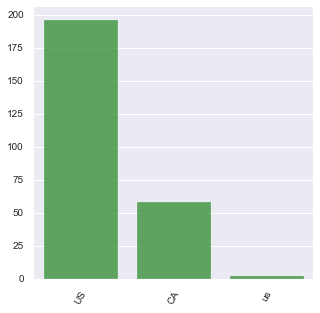

In [29]:
# checking country-wise sales 
Cust_country=df[['Country','Em_Sent_Num']].drop_duplicates()

#Calculating the distinct count of customer for each country
Cust_country_count=Cust_country.groupby(['Country'])['Em_Sent_Num'].\
aggregate('count').reset_index().sort_values('Em_Sent_Num', ascending=False)

#Plotting the count of customers
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['Em_Sent_Num'])
plt.figure(figsize=(5,5))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

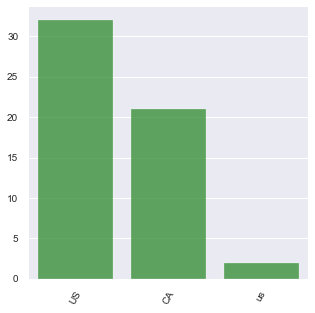

In [30]:
# checking country-wise sales 
Cust_country=df[['Country','Eml_Click_Num']].drop_duplicates()

#Calculating the distinct count of customer for each country
Cust_country_count=Cust_country.groupby(['Country'])['Eml_Click_Num'].\
aggregate('count').reset_index().sort_values('Eml_Click_Num', ascending=False)

#Plotting the count of customers
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['Eml_Click_Num'])
plt.figure(figsize=(5,5))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

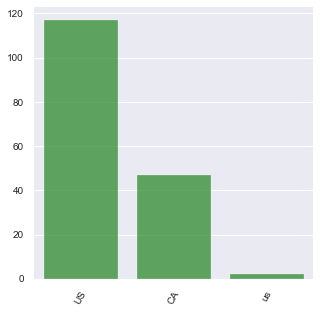

In [31]:
# checking country-wise sales 
Cust_country=df[['Country','Eml_open_Num']].drop_duplicates()

#Calculating the distinct count of customer for each country
Cust_country_count=Cust_country.groupby(['Country'])['Eml_open_Num'].\
aggregate('count').reset_index().sort_values('Eml_open_Num', ascending=False)

#Plotting the count of customers
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['Eml_open_Num'])
plt.figure(figsize=(5,5))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

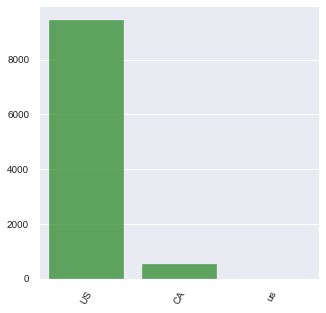

In [32]:
# checking country-wise sales 
Cust_country=df[['Country','Midascontactid']].drop_duplicates()

#Calculating the distinct count of customer for each country
Cust_country_count=Cust_country.groupby(['Country'])['Midascontactid'].\
aggregate('count').reset_index().sort_values('Midascontactid', ascending=False)

#Plotting the count of customers
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['Midascontactid'])
plt.figure(figsize=(5,5))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

Now we will start with the RFM analysis. I tagged each customer on a scale of 1 to 5 for each of the criterion where 5 will be the highest and 1 will be the lowest tagging. The customers on the top of all the three criterion will be the most significant customers.

RFM (Recency, Frequency, Monetary) analysis
RFM criterion is one of the oldest and most widely used technique for selecting the most significant customers. It supports the selection of customers that are most recent (R), frequent (F), and add a larger monetary value (M) in every transaction

Recency (R): Recency is the most important predictor of who is more likely to respond to an offer. Customers who have purchased recently are more likely to purchase again when compared to those who did not purchase recently. To tag the customers on the basis of recency flag, we will first filter the customers of United Kingdom and take distinct dates of their purchase.

In [33]:
Cust_date_US = df[df['Country']=='US']
Cust_date_US=Cust_date_US[['Midascontactid','date']].drop_duplicates()


In [34]:
def recency(row):
    if row['date']<201901:
        val = 5
    elif row['date'] <= 201902 and row['date'] > 201904:
        val = 4
    elif row['date'] <= 201906 and row['date'] > 201908:
        val = 3
    elif row['date'] <= 201910 and row['date'] > 20204:
        val = 2
    else:
        val = 1
    return val

Cust_date_US['Recency_Flag'] = Cust_date_US.apply(recency, axis=1)
Cust_date_US.head()

Midascontactid    date  Recency_Flag
0      1020375449  201904             2
1      1042778096  201910             2
2      1039527195  201907             2
3      1008356168  201911             1
4      1038164470  201904             2


Frequency (F):
The second most important factor is how frequently these customers purchase. The higher the frequency, the higher is the chances of these responding to the offers. To tag the customers on the basis of frequency flag, we will take country wise count of distinct invoice number for each customer and then filter out the customers of United Kingdom. After that, invoice count will be split into 5 equal parts to rank the customers on a scale of 1 to 5 where 5 being the most frequent.

In [35]:
Cust_freq=df[['Country','Midascontactid','Eml_open_Num']].drop_duplicates()
Cust_freq.head()

#Calculating the count of unique purchase for each customer and his buying freq in descending order
Cust_freq_count=Cust_freq.groupby(['Country','Midascontactid'])['Eml_open_Num'].aggregate('count').\
reset_index().sort_values('Eml_open_Num', ascending=False)


Cust_freq_count_US=Cust_freq_count[Cust_freq_count['Country']=='US']
Cust_freq_count_US.head()
unique_invoice=Cust_freq_count_US[['Eml_open_Num']].drop_duplicates()


In [36]:

# Dividing in 5 equal parts
unique_invoice['Freqency_Band'] = pd.qcut(unique_invoice['Eml_open_Num'], 5)
unique_invoice=unique_invoice[['Freqency_Band']].drop_duplicates()
unique_invoice

Freqency_Band
6580     (0.8, 1.0]
9948  (-0.001, 0.2]

In [37]:
Cust_freq=df[['Country','Midascontactid','Eml_Click_Num']].drop_duplicates()
Cust_freq.head()

#Calculating the count of unique purchase for each customer and his buying freq in descending order
Cust_freq_count=Cust_freq.groupby(['Country','Midascontactid'])['Eml_Click_Num'].aggregate('count').\
reset_index().sort_values('Eml_Click_Num', ascending=False)


Cust_freq_count_US=Cust_freq_count[Cust_freq_count['Country']=='US']
Cust_freq_count_US.head()
unique_invoice=Cust_freq_count_US[['Eml_Click_Num']].drop_duplicates()


In [38]:
# Dividing in 5 equal parts
unique_invoice['Freqency_Band'] = pd.qcut(unique_invoice['Eml_Click_Num'], 10)
unique_invoice=unique_invoice[['Freqency_Band']].drop_duplicates()
unique_invoice

Freqency_Band
6580     (0.9, 1.0]
9948  (-0.001, 0.1]